# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
import os

In [3]:
os.getcwd()

'/Users/alejandro/Documents/nanodegree_ds/practica clusters'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [4]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',delimiter=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',delimiter=';')

In [5]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print(len(azdias))
print(len(azdias.columns))
print(azdias.describe())
azdias



891221
85
            AGER_TYP  ALTERSKATEGORIE_GROB      ANREDE_KZ  CJT_GESAMTTYP  \
count  891221.000000         891221.000000  891221.000000  886367.000000   
mean       -0.358435              2.777398       1.522098       3.632838   
std         1.198724              1.068775       0.499512       1.595021   
min        -1.000000              1.000000       1.000000       1.000000   
25%        -1.000000              2.000000       1.000000       2.000000   
50%        -1.000000              3.000000       2.000000       4.000000   
75%        -1.000000              4.000000       2.000000       5.000000   
max         3.000000              9.000000       2.000000       6.000000   

       FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
count      891221.000000  891221.000000     891221.000000   891221.000000   
mean            3.074528       2.821039          3.401106        3.033328   
std             1.321055       1.464749          1.322134        1.529603 

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [6]:
print(len(feat_info))
print(len(feat_info.columns))
print(feat_info.describe())
feat_info

85
4
       attribute information_level     type missing_or_unknown
count         85                85       85                 85
unique        85                 9        5                  9
top     ZABEOTYP            person  ordinal               [-1]
freq           1                43       49                 26


,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [7]:
#original = feat_info['missing_or_unknown'][0]
#original = original.replace("[", "")
#original = original.replace("]", "")
#original=original.split(',')
#ar=np.array(list(original), dtype=int)
#for i in ar:
#    azdias[azdias.columns[0]][azdias[azdias.columns[0]]==i]=np.NaN

In [8]:
azdias.isnull().sum(axis = 0)

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [9]:
sum(azdias.isnull().reset_index().values)

array([397136989810, 0, 0, 0, 4854, 0, 0, 0, 0, 0, 0, 0, 0, 4854, 0, 0,
       4854, 4854, 4854, 4854, 4854, 4854, 0, 0, 4854, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 73499, 73499, 0, 0, 73499, 73499, 73499,
       18348, 584612, 107602, 73499, 93148, 97008, 93148, 73969, 93148,
       93148, 93148, 98979, 98979, 98979, 133324, 133324, 133324, 133324,
       133324, 133324, 93740, 93740, 93740, 93155, 121196, 133324, 4854,
       121196, 105800, 116515, 116515, 116515, 116515, 116515, 116515,
       116515, 97216, 97216, 97216], dtype=object)

In [10]:
for i in np.arange(len(azdias.columns)):
    original = feat_info['missing_or_unknown'][i]
    original = original.replace("[", "")
    original = original.replace("]", "")
    if(original==''):
        print('variable '+ str(i)+' doesnt have na')
    else:
        original=original.split(',')
        #ar=np.array(list(original), dtype=int)
        ar=list(original)
        for j in ar:
            if(j=='X' or j=='XX'):
                print('variable '+str(i)+' is X or XX')
            else:
                j=int(j)
                print('variable '+str(i)+' is '+str(j)+' has '+str(sum(azdias[azdias.columns[i]]==j)))
            azdias[azdias.columns[i]][azdias[azdias.columns[i]]==j]=np.NaN
    

variable 0 is -1 has 677503


/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


variable 0 is 0 has 8340
variable 1 is -1 has 0
variable 1 is 0 has 0
variable 1 is 9 has 2881
variable 2 is -1 has 0
variable 2 is 0 has 0
variable 3 is 0 has 0
variable 4 is -1 has 0
variable 5 is -1 has 0
variable 6 is -1 has 0
variable 7 is -1 has 0
variable 8 is -1 has 0
variable 9 is -1 has 0
variable 10 is -1 has 0
variable 11 is 0 has 392318
variable 12 doesnt have na
variable 13 doesnt have na
variable 14 is -1 has 111196
variable 14 is 0 has 0
variable 15 is 0 has 92778
variable 16 is 0 has 89718
variable 17 is 0 has 72938
variable 18 is 0 has 72938
variable 19 is 0 has 0
variable 20 is 0 has 0
variable 21 is -1 has 0
variable 21 is 0 has 108315
variable 22 is -1 has 0
variable 22 is 0 has 108164
variable 23 is 0 has 0
variable 24 is -1 has 0
variable 24 is 9 has 0
variable 25 is -1 has 0
variable 25 is 9 has 0
variable 26 is -1 has 0
variable 26 is 9 has 0
variable 27 is -1 has 0
variable 27 is 9 has 0
variable 28 is -1 has 0
variable 28 is 9 has 0
variable 29 is -1 has 0
va

In [11]:
azdias.isnull().sum(axis = 0)

AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [12]:
# Identify missing or unknown data values and convert them to NaNs.



#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

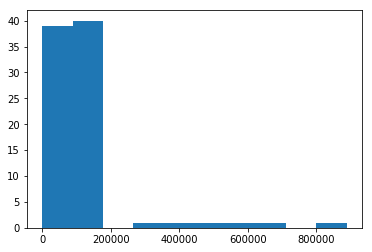

In [13]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x=azdias.isnull().sum(axis = 0)
plt.hist(x)
plt.show()

In [14]:
x.sort_values(ascending=False).head(25)

TITEL_KZ          889061
AGER_TYP          685843
KK_KUNDENTYP      584612
KBA05_BAUMAX      476524
GEBURTSJAHR       392318
ALTER_HH          310267
REGIOTYP          158064
KKK               158064
W_KEIT_KIND_HH    147988
KBA05_ANTG4       133324
KBA05_GBZ         133324
MOBI_REGIO        133324
KBA05_ANTG1       133324
KBA05_ANTG2       133324
KBA05_ANTG3       133324
PLZ8_GBZ          116515
PLZ8_HHZ          116515
PLZ8_BAUMAX       116515
PLZ8_ANTG4        116515
PLZ8_ANTG1        116515
PLZ8_ANTG3        116515
PLZ8_ANTG2        116515
SHOPPER_TYP       111196
VERS_TYP          111196
HEALTH_TYP        111196
dtype: int64

In [15]:
# Investigate patterns in the amount of missing data in each column.
x[(x>200000)]
#AGER_TYP: Best-ager typology
#GEBURTSJAHR: Year of birth
#TITEL_KZ: Academic  title flag. This variable is very confusing
#ALTER_HH: Birthdate of head of household
#KK_KUNDENTYP: Consumer pattern over past 12 months
#KBA05_BAUMAX: Most common building type within the microcell

AGER_TYP        685843
GEBURTSJAHR     392318
TITEL_KZ        889061
ALTER_HH        310267
KK_KUNDENTYP    584612
KBA05_BAUMAX    476524
dtype: int64

In [16]:
a = azdias.columns#long
b = np.array(x[(x>200000)].index)#short
    
v=[]

for x in a:
    if x in b:
        print(x+' esta')
    else:
        v.append(x)
        #v.append(b.index(x))
v

AGER_TYP esta
GEBURTSJAHR esta
TITEL_KZ esta
ALTER_HH esta
KK_KUNDENTYP esta
KBA05_BAUMAX esta


['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'PRAEGENDE_JUGENDJAHRE',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'GEBAEUDETYP',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'WOHNLAGE',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'CAMEO_INTL_2015',
 'KBA05_ANTG1',
 'K

In [17]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

azdiasAux=azdias[v]
azdiasAux.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1,2.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)


x[(x>200000)]

- AGER_TYP: Best-ager typology
- GEBURTSJAHR: Year of birth
- TITEL_KZ: Academic  title flag. This variable is very confusing
- ALTER_HH: Birthdate of head of household
- KK_KUNDENTYP: Consumer pattern over past 12 months
- KBA05_BAUMAX: Most common building type within the microcell

I think that none of this variable add so many information so I have decided to delete this six variables.


But I have found a pattern:
if we order the number of missing observation per:

' row x.sort_values(ascending=False).head(25)'
we can see that the number of missing values of a variable is similar to the number of missing in a related variable. For example all this have the same number of missing
- KBA05_ANTG4       133324
- KBA05_GBZ         133324
- MOBI_REGIO        133324
- KBA05_ANTG1       133324
- KBA05_ANTG2       133324
- KBA05_ANTG3       133324

And all this 
- PLZ8_GBZ          116515
- PLZ8_HHZ          116515
- PLZ8_BAUMAX       116515
- PLZ8_ANTG4        116515
- PLZ8_ANTG1        116515
- PLZ8_ANTG3        116515
- PLZ8_ANTG2        116515

This may happen because when a new question is made is only asked to newer house so the older house will not have any of the related questions.


#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

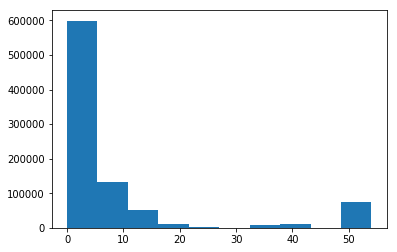

In [18]:
# How much data is missing in each row of the dataset?
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Y=azdias.isnull().sum(axis = 1)
plt.hist(Y)
plt.show()


In [19]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
v=[]
for i in range(max(Y)):
    v.append((sum(Y>(i))/len(Y)))
    

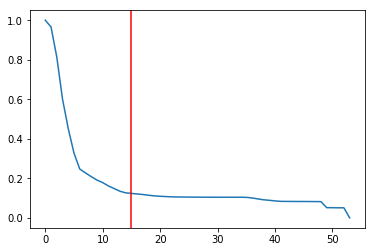

In [20]:
plt.plot(v)
plt.axvline(x=15,color='r')

we can see an elvow so the criterio is the same delete the observation with more than 6 missing. This is because 6 are the number of outlier columns


In [21]:
azdias1=azdias.loc[(Y<15)]
azdias2=azdias.loc[(Y>=15)]
print(len(azdias1))
print(len(azdias2))


778195
113026


In [22]:
x1=azdias1.isnull().sum(axis = 0)
x1.sort_values(ascending=True).head(5)

ZABEOTYP      0
SEMIO_REL     0
SEMIO_MAT     0
SEMIO_VERT    0
SEMIO_LUST    0
dtype: int64

In [23]:
x2=azdias2.isnull().sum(axis = 0)
x2.sort_values(ascending=True).head(5)

ZABEOTYP         0
SEMIO_TRADV      0
SEMIO_PFLICHT    0
SEMIO_KAEM       0
SEMIO_DOM        0
dtype: int64

In [24]:
var=[]
for i in azdias1.columns:
    if 'SEMIO' in i:
        var.append(i)

/Users/alejandro/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


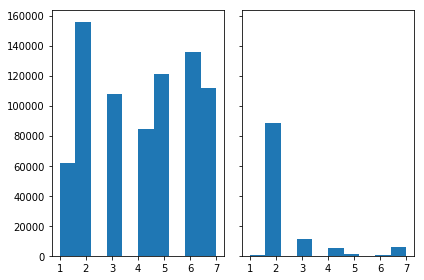

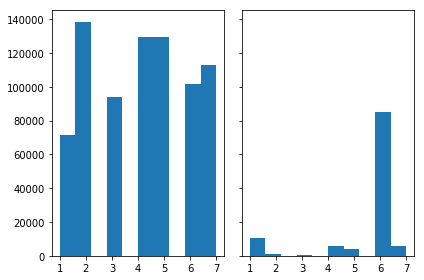

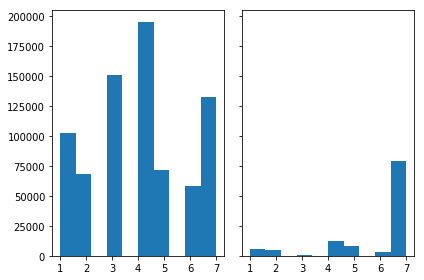

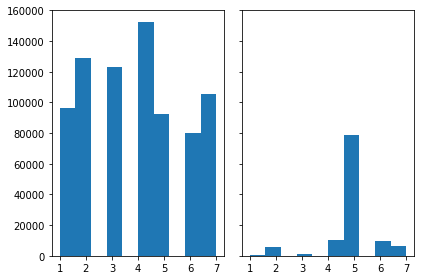

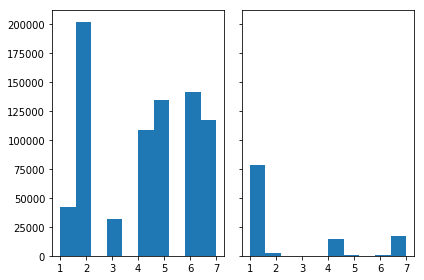

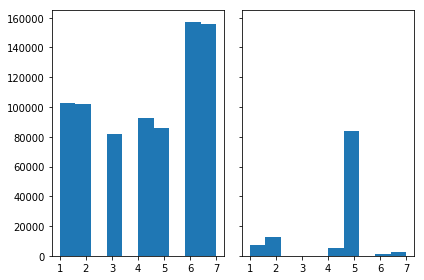

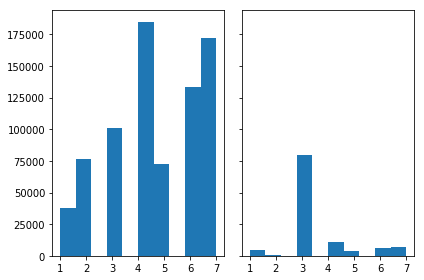

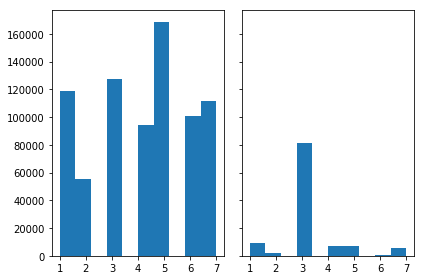

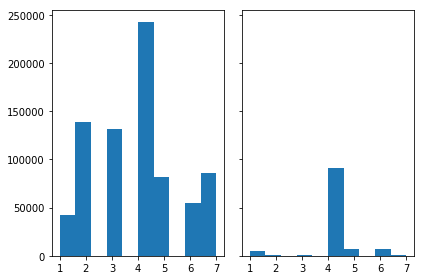

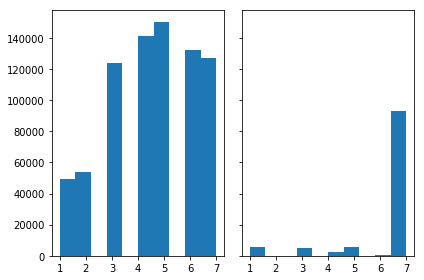

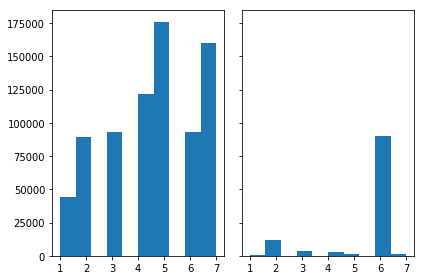

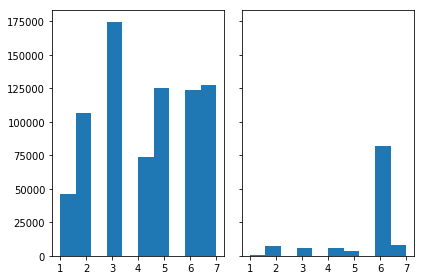

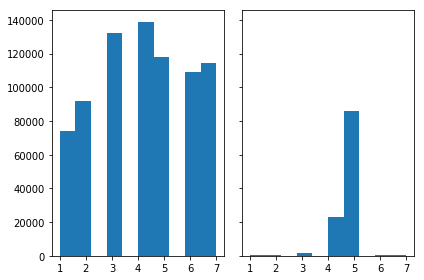

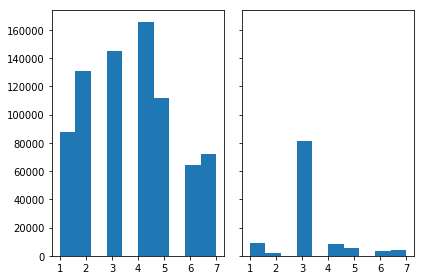

In [25]:
for i in var:
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    # We can set the number of bins with the `bins` kwarg
    axs[0].hist(azdias1[[i]])
    axs[1].hist(azdias2[[i]])

In [26]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.


(array([  4064.,      0.,   2421.,      0.,  89252.,      0.,   6996.,
             0.,   5427.,   4866.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

/Users/alejandro/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


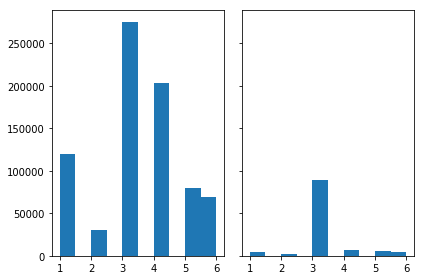

In [27]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(azdias1[['ZABEOTYP']])
axs[1].hist(azdias2[['ZABEOTYP']])


there are differences between two groups

#### Discussion 1.1.3: Assess Missing Data in Each Row

(Double-click this cell and replace this text with your own text, reporting your observations regarding missing data in rows. Are the data with lots of missing values are qualitatively different from data with few or no missing values?)

If we choose 15 as threshold we can see that there are a few differences between de distribution of the variable in the complete observation dataset and noncomplete observation dataset so I would rather do not delete any row. This is because if we delete some row we lose part of usefull information maybe we will not be hable to explain a behaviour




### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [28]:
# How many features are there of each data type?


pd.crosstab(index=feat_info['type'],columns="count") 


col_0,count
type,
categorical,21
interval,1
mixed,7
numeric,7
ordinal,49


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [29]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

categorical=feat_info['attribute'][feat_info['type']=='categorical']
df=0
for i in categorical:
    if(isinstance(df, pd.DataFrame)):
        df2=pd.get_dummies(azdias[i])
        df2=df2.add_prefix(i)
        frames = [df, df2]
        df=pd.concat(frames,axis=1)
    else:
        df=pd.get_dummies(azdias[i])
        df=df.add_prefix(i)
    print(str(i)+' has '+str(len(pd.crosstab(index=azdias[i],columns="count"))))


AGER_TYP has 3
ANREDE_KZ has 2
CJT_GESAMTTYP has 6
FINANZTYP has 6
GFK_URLAUBERTYP has 12
GREEN_AVANTGARDE has 2
LP_FAMILIE_FEIN has 11
LP_FAMILIE_GROB has 5
LP_STATUS_FEIN has 10
LP_STATUS_GROB has 5
NATIONALITAET_KZ has 3
SHOPPER_TYP has 4
SOHO_KZ has 2
TITEL_KZ has 5
VERS_TYP has 2
ZABEOTYP has 6
KK_KUNDENTYP has 6
GEBAEUDETYP has 7
OST_WEST_KZ has 2
CAMEO_DEUG_2015 has 9
CAMEO_DEU_2015 has 44


In [30]:
# Re-encode categorical variable(s) to be kept in the analysis.


#### Discussion 1.2.1: Re-Encode Categorical Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

I have find pd.get_dummies variable and it is more simpler than onehotencoder. We need to create dummys because pca need numerical values, it can't deal with categorical variables.


#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [31]:
feat_info['attribute'][feat_info['type']=='mixed']

15      LP_LEBENSPHASE_FEIN
16      LP_LEBENSPHASE_GROB
22    PRAEGENDE_JUGENDJAHRE
56                 WOHNLAGE
59          CAMEO_INTL_2015
64             KBA05_BAUMAX
79              PLZ8_BAUMAX
Name: attribute, dtype: object

In [32]:
def movement(row):
    va=row['PRAEGENDE_JUGENDJAHRE']
    va=str(va)
    if(va=='nan'):
        return 'nan'
    elif(va=='1.0'or va=='3.0' or va=='5.0' or va=='8.0' or va=='10.0' or va=='12.0' or va=='14.0'):
        return 'Mainstream'
    elif (va=='2.0'or va=='4.0' or va=='6.0' or va=='7.0' or va=='9.0' or va=='11.0' or va=='13.0' or va=='15.0'):
        return 'Avantgarde'
    else:
        return 'n'
    
    
def nation(row):
    va=row['PRAEGENDE_JUGENDJAHRE']
    va=str(va)
    if(va=='nan'):
        return 'nan'
    elif(va=='1.0'or va=='2.0' or va=='3.0' or va=='4.0' or va=='5.0' or va=='8.0' or va=='9.0'or va=='14.0'or va=='15.0'):
        return 'E+W'
    elif (va=='6.0'or va=='10.0' or va=='11.0' ):
        return 'W'
    elif(va=='7.0'or va=='12.0' or va=='13.0'):
        return 'E'
    else:
        return 'n'
 

In [33]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
azdias['movement'] = azdias.apply(movement,axis=1)
azdias['nation'] = azdias.apply(nation,axis=1)

In [34]:
print(pd.crosstab(index=azdias['movement'],columns="count")) 
print('-----')
print(pd.crosstab(index=azdias['nation'],columns="count") )

col_0        count
movement          
Avantgarde  175225
Mainstream  607832
nan         108164
-----
col_0    count
nation        
E        34220
E+W     601625
W       147212
nan     108164


In [35]:
def Households(row):
    va=row['CAMEO_INTL_2015']
    va=str(va)
    if(va=='nan'):
        return 'nan'
    elif(va=='11' or va=='12' or va=='13' or va=='14' or va=='15'):
        return 'Wealthy Households'
    elif (va=='21' or va=='22' or va=='23' or va=='24' or va=='25'):
        return 'Prosperous '
    elif (va=='31' or va=='32' or va=='33' or va=='34' or va=='35'):
        return 'Comfortable'
    elif (va=='41' or va=='42' or va=='43' or va=='44' or va=='45'):
        return 'Less Affluent'
    elif (va=='51' or va=='52' or va=='53' or va=='54' or va=='55'):
        return 'Poorer'
    else:
        return 'n'
    

    
    
def family(row):
    va=row['CAMEO_INTL_2015']
    va=str(va)
    if(va=='nan'):
        return 'nan'
    elif(va=='15' or va=='25' or va=='35' or va=='45' or va=='55'):
        return 'Elders In Retirement'
    elif (va=='13' or va=='23' or va=='33' or va=='43' or va=='53'):
        return 'Families With School Age Children '
    elif (va=='14' or va=='24' or va=='34' or va=='44' or va=='54'):
        return 'Older Families & Mature Couples'
    elif (va=='11' or va=='21' or va=='31' or va=='41' or va=='51'):
        return 'Pre,Family Couples & Singles'
    elif (va=='12' or va=='22' or va=='32' or va=='42' or va=='52'):
        return 'Young Couples With Children'
    else:
        return 'n'


In [36]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
azdias['Households'] = azdias.apply(Households,axis=1)
azdias['family'] = azdias.apply(family,axis=1)


In [37]:
print(pd.crosstab(index=azdias['Households'],columns="count") )
print('-----')
print(pd.crosstab(index=azdias['family'],columns="count") )

col_0                count
Households                
Comfortable          68193
Less Affluent       189960
Poorer              223582
Prosperous          190691
Wealthy Households  119443
nan                  99352
-----
col_0                                count
family                                    
Elders In Retirement                117045
Families With School Age Children   119693
Older Families & Mature Couples     232777
Pre,Family Couples & Singles        245054
Young Couples With Children          77300
nan                                  99352


#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)


In this approach I have decide delete the others mixed variables

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [38]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)



In [39]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',delimiter=';')

azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',delimiter=';')
#1 nan----
for i in np.arange(len(azdias.columns)):
    original = feat_info['missing_or_unknown'][i]
    original = original.replace("[", "")
    original = original.replace("]", "")
    if(original==''):
        print('variable '+ str(i)+' doesnt have na')
    else:
        original=original.split(',')
        ar=list(original)
        for j in ar:
            if(j=='X' or j=='XX'):
                print('variable '+str(i)+' is X or XX')
            else:
                j=int(j)
                print('variable '+str(i)+' is '+str(j)+' has '+str(sum(azdias[azdias.columns[i]]==j)))
            azdias[azdias.columns[i]][azdias[azdias.columns[i]]==j]=np.NaN

#3 mixed----

azdias['movement'] = azdias.apply(movement,axis=1)
azdias['nation'] = azdias.apply(nation,axis=1)

azdias['Households'] = azdias.apply(Households,axis=1)
azdias['family'] = azdias.apply(family,axis=1)

#4 categorical----
categorical=feat_info['attribute'][feat_info['type']=='categorical']
categorical=categorical.append(pd.Series(['movement', 'nation', 'Households','family']))
df=0
for i in categorical:
    if(isinstance(df, pd.DataFrame)):
        df2=pd.get_dummies(azdias[i])
        df2=df2.add_prefix(i)
        frames = [df, df2]
        df=pd.concat(frames,axis=1)
    else:
        df=pd.get_dummies(azdias[i])
        df=df.add_prefix(i)



variable 0 is -1 has 677503
variable 0 is 0 has 8340


/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


variable 1 is -1 has 0
variable 1 is 0 has 0
variable 1 is 9 has 2881
variable 2 is -1 has 0
variable 2 is 0 has 0
variable 3 is 0 has 0
variable 4 is -1 has 0
variable 5 is -1 has 0
variable 6 is -1 has 0
variable 7 is -1 has 0
variable 8 is -1 has 0
variable 9 is -1 has 0
variable 10 is -1 has 0
variable 11 is 0 has 392318
variable 12 doesnt have na
variable 13 doesnt have na
variable 14 is -1 has 111196
variable 14 is 0 has 0
variable 15 is 0 has 92778
variable 16 is 0 has 89718
variable 17 is 0 has 72938
variable 18 is 0 has 72938
variable 19 is 0 has 0
variable 20 is 0 has 0
variable 21 is -1 has 0
variable 21 is 0 has 108315
variable 22 is -1 has 0
variable 22 is 0 has 108164
variable 23 is 0 has 0
variable 24 is -1 has 0
variable 24 is 9 has 0
variable 25 is -1 has 0
variable 25 is 9 has 0
variable 26 is -1 has 0
variable 26 is 9 has 0
variable 27 is -1 has 0
variable 27 is 9 has 0
variable 28 is -1 has 0
variable 28 is 9 has 0
variable 29 is -1 has 0
variable 29 is 9 has 0
vari

In [40]:
numeric=feat_info['attribute'][feat_info['type']=='ordinal']
numeric=numeric.append(feat_info['attribute'][feat_info['type']=='numeric'])
numeric=numeric.append(feat_info['attribute'][feat_info['type']=='interval'])

dfnumeric=azdias[numeric]


In [41]:
frames = [dfnumeric, df]
azdias2=pd.concat(frames,axis=1)

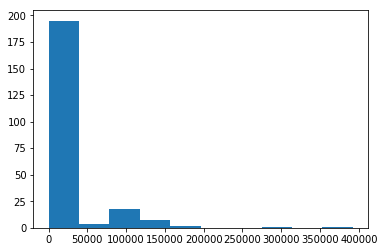

In [42]:
import matplotlib.pyplot as plt
x=azdias2.isnull().sum(axis = 0)
plt.hist(x)
plt.show()


In [43]:
a = azdias2.columns#long
b = np.array(x[(x>200000)].index)#short

v=[]

for x in a:
    if x in b:
        print(x+' esta')
    else:
        v.append(x)
azdiasFinal=azdias2[v]

GEBURTSJAHR esta
ALTER_HH esta


In [44]:
azdiasFinal.head()

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,HouseholdsPoorer,HouseholdsProsperous,HouseholdsWealthy Households,Householdsnan,familyElders In Retirement,familyFamilies With School Age Children,familyOlder Families & Mature Couples,"familyPre,Family Couples & Singles",familyYoung Couples With Children,familynan
0,2.0,3,4,3,5,5,3,NaN,5.0,2,...,0,0,0,1,0,0,0,0,0,1
1,1.0,1,5,2,5,4,5,3.0,1.0,5,...,1,0,0,0,0,0,0,1,0,0
2,3.0,1,4,1,2,3,5,3.0,3.0,4,...,0,1,0,0,0,0,1,0,0,0
3,4.0,4,2,5,2,1,2,2.0,2.0,5,...,0,0,1,0,0,0,0,0,1,0
4,3.0,4,3,4,1,3,2,3.0,5.0,6,...,0,0,0,0,0,1,0,0,0,0


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [45]:
def movement(row):
    va=row['PRAEGENDE_JUGENDJAHRE']
    va=str(va)
    if(va=='nan'):
        return 'nan'
    elif(va=='1.0'or va=='3.0' or va=='5.0' or va=='8.0' or va=='10.0' or va=='12.0' or va=='14.0'):
        return 'Mainstream'
    elif (va=='2.0'or va=='4.0' or va=='6.0' or va=='7.0' or va=='9.0' or va=='11.0' or va=='13.0' or va=='15.0'):
        return 'Avantgarde'
    else:
        return 'n'
    
    
def nation(row):
    va=row['PRAEGENDE_JUGENDJAHRE']
    va=str(va)
    if(va=='nan'):
        return 'nan'
    elif(va=='1.0'or va=='2.0' or va=='3.0' or va=='4.0' or va=='5.0' or va=='8.0' or va=='9.0'or va=='14.0'or va=='15.0'):
        return 'E+W'
    elif (va=='6.0'or va=='10.0' or va=='11.0' ):
        return 'W'
    elif(va=='7.0'or va=='12.0' or va=='13.0'):
        return 'E'
    else:
        return 'n'

def Households(row):
    va=row['CAMEO_INTL_2015']
    va=str(va)
    if(va=='nan'):
        return 'nan'
    elif(va=='11' or va=='12' or va=='13' or va=='14' or va=='15'):
        return 'Wealthy Households'
    elif (va=='21' or va=='22' or va=='23' or va=='24' or va=='25'):
        return 'Prosperous '
    elif (va=='31' or va=='32' or va=='33' or va=='34' or va=='35'):
        return 'Comfortable'
    elif (va=='41' or va=='42' or va=='43' or va=='44' or va=='45'):
        return 'Less Affluent'
    elif (va=='51' or va=='52' or va=='53' or va=='54' or va=='55'):
        return 'Poorer'
    else:
        return 'n'
    

    
    
def family(row):
    va=row['CAMEO_INTL_2015']
    va=str(va)
    if(va=='nan'):
        return 'nan'
    elif(va=='15' or va=='25' or va=='35' or va=='45' or va=='55'):
        return 'Elders In Retirement'
    elif (va=='13' or va=='23' or va=='33' or va=='43' or va=='53'):
        return 'Families With School Age Children '
    elif (va=='14' or va=='24' or va=='34' or va=='44' or va=='54'):
        return 'Older Families & Mature Couples'
    elif (va=='11' or va=='21' or va=='31' or va=='41' or va=='51'):
        return 'Pre,Family Couples & Singles'
    elif (va=='12' or va=='22' or va=='32' or va=='42' or va=='52'):
        return 'Young Couples With Children'
    else:
        return 'n'

    

def clean_data(azdias,need_be_cleaned=True):
    """
        Perform feature trimming, re-encoding, and engineering for demographics
        data
        
        INPUT: Demographics DataFrame
        OUTPUT: Trimmed and cleaned demographics DataFrame
        """
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',delimiter=';')
    if (need_be_cleaned==True):
        
        #azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',delimiter=';')
        #1 nan----
        for i in np.arange(len(azdias.columns)):
            original = feat_info['missing_or_unknown'][i]
            original = original.replace("[", "")
            original = original.replace("]", "")
            if(original==''):
                print('variable '+ str(i)+' doesnt have na')
            else:
                original=original.split(',')
                ar=list(original)
                for j in ar:
                    if(j=='X' or j=='XX'):
                        print('variable '+str(i)+' is X or XX')
                    else:
                        j=int(j)
                        print('variable '+str(i)+' is '+str(j)+' has '+str(sum(azdias[azdias.columns[i]]==j)))
                    azdias[azdias.columns[i]][azdias[azdias.columns[i]]==j]=np.NaN
    
    #3 mixed----
    
    azdias['movement'] = azdias.apply(movement,axis=1)
    azdias['nation'] = azdias.apply(nation,axis=1)
    
    azdias['Households'] = azdias.apply(Households,axis=1)
    azdias['family'] = azdias.apply(family,axis=1)
    
    #4 categorical----
    categorical=feat_info['attribute'][feat_info['type']=='categorical']
    categorical=categorical.append(pd.Series(['movement', 'nation', 'Households','family']))
    df=0
    for i in categorical:
        if(isinstance(df, pd.DataFrame)):
            df2=pd.get_dummies(azdias[i])
            df2=df2.add_prefix(i)
            frames = [df, df2]
            df=pd.concat(frames,axis=1)
        else:
            df=pd.get_dummies(azdias[i])
            df=df.add_prefix(i)
    
    
    numeric=feat_info['attribute'][feat_info['type']=='ordinal']
    numeric=numeric.append(feat_info['attribute'][feat_info['type']=='numeric'])
    numeric=numeric.append(feat_info['attribute'][feat_info['type']=='interval'])
    
    dfnumeric=azdias[numeric]
    
    frames = [dfnumeric, df]
    azdias2=pd.concat(frames,axis=1)
    x=azdias2.isnull().sum(axis = 0)
    
    a = azdias2.columns#long
    b = np.array(x[(x>200000)].index)#short
    
    v=[]
    
    for x in a:
        if x in b:
            print(x+' esta')
        else:
            v.append(x)
    azdiasFinal=azdias2[v]
        # Put in code here to execute all main cleaning steps:
        # convert missing value codes into NaNs, ...
        
        
    # remove selected columns and rows, ...

    
    # select, re-encode, and engineer column values.

    
    # Return the cleaned dataframe.
    return(azdiasFinal)

def clean_data2(azdias,need_be_cleaned=True):
    """
        Perform feature trimming, re-encoding, and engineering for demographics
        data
        
        INPUT: Demographics DataFrame
        OUTPUT: Trimmed and cleaned demographics DataFrame
        """
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',delimiter=';')
    feat_info['id']=feat_info.index
    if (need_be_cleaned==True):
        
        #azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',delimiter=';')
        #1 nan----
        for i in azdias.columns :
            if(sum(feat_info['attribute']==i)==0):
                print('variable '+ str(i)+' is new')
            else:
                print('variable '+ str(i)+' is known')
                index=int(feat_info[feat_info['attribute']==i]['id'])
                original = feat_info['missing_or_unknown'][index]
                original = original.replace("[", "")
                original = original.replace("]", "")
                if(original==''):
                    print('variable '+ str(i)+' doesnt have na')
                else:
                    original=original.split(',')
                    ar=list(original)
                    for j in ar:
                        if(j=='X' or j=='XX'):
                            print('variable '+str(i)+' is X or XX')
                        else:
                            j=int(j)
                            print('variable '+str(i)+' is '+str(j)+' has '+str(sum(azdias[i]==j)))
                        azdias[i][azdias[i]==j]=np.NaN
    
    #3 mixed----
    
    azdias['movement'] = azdias.apply(movement,axis=1)
    azdias['nation'] = azdias.apply(nation,axis=1)
    
    azdias['Households'] = azdias.apply(Households,axis=1)
    azdias['family'] = azdias.apply(family,axis=1)
    
    #4 categorical----
    categorical=feat_info['attribute'][feat_info['type']=='categorical']
    categorical=categorical.append(pd.Series(['movement', 'nation', 'Households','family']))
    df=0
    for i in categorical:
        if(isinstance(df, pd.DataFrame)):
            df2=pd.get_dummies(azdias[i])
            df2=df2.add_prefix(i)
            frames = [df, df2]
            df=pd.concat(frames,axis=1)
        else:
            df=pd.get_dummies(azdias[i])
            df=df.add_prefix(i)
    
    
    numeric=feat_info['attribute'][feat_info['type']=='ordinal']
    numeric=numeric.append(feat_info['attribute'][feat_info['type']=='numeric'])
    numeric=numeric.append(feat_info['attribute'][feat_info['type']=='interval'])
    
    dfnumeric=azdias[numeric]
    
    frames = [dfnumeric, df]
    azdias2=pd.concat(frames,axis=1)
    x=azdias2.isnull().sum(axis = 0)
    
    a = azdias2.columns#long
    b = np.array(x[(x>200000)].index)#short
    
    v=[]
    
    for x in a:
        if x in b:
            print(x+' esta')
        else:
            v.append(x)
    azdiasFinal=azdias2[v]
        # Put in code here to execute all main cleaning steps:
        # convert missing value codes into NaNs, ...
        
        
    # remove selected columns and rows, ...

    
    # select, re-encode, and engineer column values.

    
    # Return the cleaned dataframe.
    return(azdiasFinal)
    

In [46]:
#for i in azdias2.columns:
#    if 'nan' in i:
#        print(i)

In [47]:
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',delimiter=';')
azdias2=clean_data2(azdias)

variable AGER_TYP is known
variable AGER_TYP is -1 has 677503


/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


variable AGER_TYP is 0 has 8340
variable ALTERSKATEGORIE_GROB is known
variable ALTERSKATEGORIE_GROB is -1 has 0
variable ALTERSKATEGORIE_GROB is 0 has 0
variable ALTERSKATEGORIE_GROB is 9 has 2881
variable ANREDE_KZ is known
variable ANREDE_KZ is -1 has 0
variable ANREDE_KZ is 0 has 0
variable CJT_GESAMTTYP is known
variable CJT_GESAMTTYP is 0 has 0
variable FINANZ_MINIMALIST is known
variable FINANZ_MINIMALIST is -1 has 0
variable FINANZ_SPARER is known
variable FINANZ_SPARER is -1 has 0
variable FINANZ_VORSORGER is known
variable FINANZ_VORSORGER is -1 has 0
variable FINANZ_ANLEGER is known
variable FINANZ_ANLEGER is -1 has 0
variable FINANZ_UNAUFFAELLIGER is known
variable FINANZ_UNAUFFAELLIGER is -1 has 0
variable FINANZ_HAUSBAUER is known
variable FINANZ_HAUSBAUER is -1 has 0
variable FINANZTYP is known
variable FINANZTYP is -1 has 0
variable GEBURTSJAHR is known
variable GEBURTSJAHR is 0 has 392318
variable GFK_URLAUBERTYP is known
variable GFK_URLAUBERTYP doesnt have na
variabl

In [48]:
azdias2.head()

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,HouseholdsPoorer,HouseholdsProsperous,HouseholdsWealthy Households,Householdsnan,familyElders In Retirement,familyFamilies With School Age Children,familyOlder Families & Mature Couples,"familyPre,Family Couples & Singles",familyYoung Couples With Children,familynan
0,2.0,3,4,3,5,5,3,NaN,5.0,2,...,0,0,0,1,0,0,0,0,0,1
1,1.0,1,5,2,5,4,5,3.0,1.0,5,...,1,0,0,0,0,0,0,1,0,0
2,3.0,1,4,1,2,3,5,3.0,3.0,4,...,0,1,0,0,0,0,1,0,0,0
3,4.0,4,2,5,2,1,2,2.0,2.0,5,...,0,0,1,0,0,0,0,0,1,0
4,3.0,4,3,4,1,3,2,3.0,5.0,6,...,0,0,0,0,0,1,0,0,0,0


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [49]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

azdias2.fillna(0, inplace=True)


In [50]:
# Apply feature scaling to the general population demographics data.
from sklearn import preprocessing as p
#
#azdias2SS=p.StandardScaler().fit_transform(azdias2) 

azdias2MM=p.MinMaxScaler().fit_transform(azdias2) 



I have choosen MinMaxScaler instead StandardScaler because it performance is better. More variablity explained in less principal components


In [51]:
azdias2[['KBA13_ANZAHL_PKW','familyElders In Retirement']].describe()

,KBA13_ANZAHL_PKW,familyElders In Retirement
count,891221.000000,891221.000000
mean,546.134487,0.131331
std,376.928058,0.337762
min,0.000000,0.000000
25%,308.000000,0.000000
50%,503.000000,0.000000
75%,738.000000,0.000000
max,2300.000000,1.000000


### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

we need feature scaling because there are variables in different scale. Now the categorical variables are dummys (0,1) for example familyElders In Retirement tales 0 and 1 and the continue variable call KBA13_ANZAHL_PKW (Number of cars in the PLZ8 region) takes continues values. This means that this two variables have diferent range of values one between 1 and 0 and the other between 0 to 2300


### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [52]:
# Apply PCA to the data.
from sklearn.decomposition import PCA

pca = PCA(20)
X_pca = pca.fit_transform(azdias2MM)


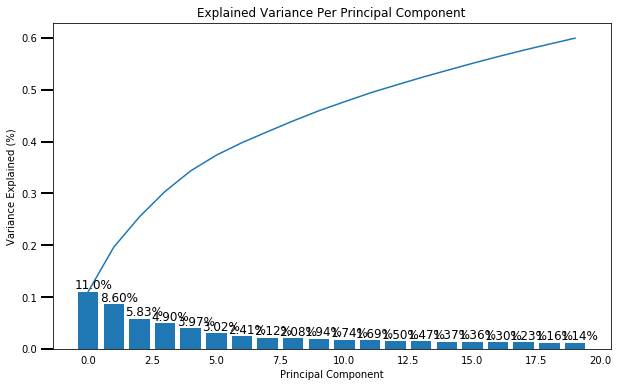

In [53]:
# Investigate the variance accounted for by each principal component.
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

In [54]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(9)
X_pca = pca.fit_transform(azdias2MM)




In [55]:
len(X_pca[0])

9

singular value greather than 1

In [56]:
pca = PCA(100)
X_pca = pca.fit_transform(azdias2MM)
eigenvalues = pca.explained_variance_
sum(eigenvalues>1)

3

### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)


With only 3 first components I can explan more than 25% of variablity. But if we follow the criterio of retain all the singular value greather than 1 we get 3 first components. Both criterion suggest that we should retain 3 first components. (The variance explained is the more relevant criterio)

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [57]:
def pca_results(full_dataset, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)





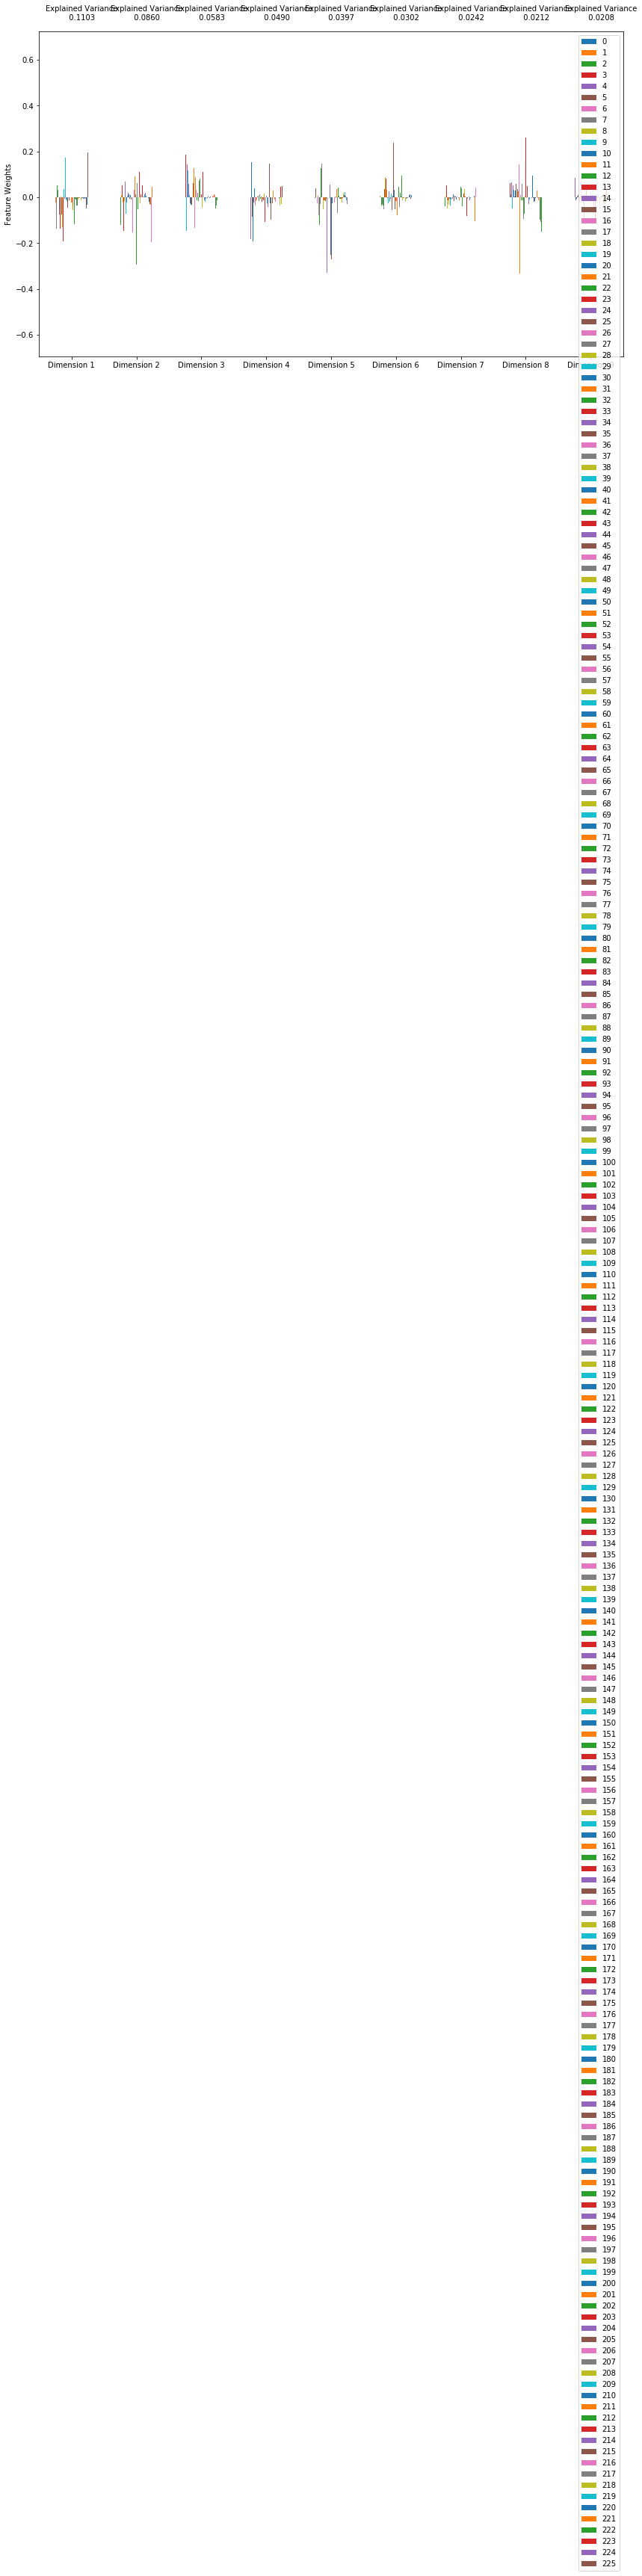

In [58]:

pca = PCA(9)
X_pca = pca.fit_transform(azdias2MM)
azdias2MMDF=pd.DataFrame(azdias2MM)

ta=pca_results(azdias2MMDF, pca)




In [59]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def topvariables(comp,ta):
    frames = [pd.DataFrame(ta.iloc[comp,1:]), pd.DataFrame(azdias2.columns)]
    df=pd.concat(frames,axis=1)
    df.columns=['weight','variable']
    df=df.sort_values(by=['weight'],ascending=False)
    return df
def lastvariables(comp,ta):
    frames = [pd.DataFrame(ta.iloc[comp,1:]), pd.DataFrame(azdias2.columns)]
    df=pd.concat(frames,axis=1)
    df.columns=['weight','variable']
    df=df.sort_values(by=['weight'],ascending=True)
    return df

df=topvariables(0,ta)
print(df.head())
print("---")
df=lastvariables(0,ta)
print(df.head())

     weight       variable
225  0.1956      familynan
219  0.1956  Householdsnan
213  0.1890      nationnan
209  0.1890    movementnan
69   0.1722     FINANZTYP4
---
     weight             variable
53  -0.1920     MIN_GEBAEUDEJAHR
117 -0.1724  NATIONALITAET_KZ1.0
124 -0.1697           SOHO_KZ0.0
153 -0.1589         OST_WEST_KZW
25  -0.1583       WOHNDAUER_2008


In [60]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.


df=topvariables(1,ta)
print(df.head())
print("---")
df=lastvariables(1,ta)
print(df.head())

     weight            variable
1    0.1939   FINANZ_MINIMALIST
85   0.1750   GREEN_AVANTGARDE1
207  0.1750  movementAvantgarde
27   0.1729         KBA05_ANTG1
111  0.1428  LP_STATUS_FEIN10.0
---
     weight                            variable
112 -0.2923                   LP_STATUS_GROB1.0
216 -0.1949                    HouseholdsPoorer
223 -0.1891  familyPre,Family Couples & Singles
84  -0.1750                   GREEN_AVANTGARDE0
102 -0.1725                   LP_STATUS_FEIN1.0


In [61]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
df=topvariables(2,ta)
print(df.head())
print("---")
df=lastvariables(2,ta)
print(df.head())


     weight          variable
135  0.3101         ZABEOTYP3
59   0.2495        ANREDE_KZ2
15   0.2034         SEMIO_ERL
3    0.1848  FINANZ_VORSORGER
20   0.1536        SEMIO_KAEM
---
    weight       variable
58 -0.2495     ANREDE_KZ1
16 -0.2359     SEMIO_KULT
2  -0.2069  FINANZ_SPARER
11 -0.2058      SEMIO_REL
10 -0.1952      SEMIO_FAM


### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

The first component gives more importance (more weight) to nans variables such as familynan, Householdsnan, nationnan, movementnan and less importance to Small office / home office flag,first year building was mentioned in the database, and Ratio of residential to commercial activity. This component can be described as the nan or incompleate data. (are very different as we have seen in previous analysis 

The second component gives more importance to Social status, Estimated household net income, Number of 10+ family houses in the PLZ8 region, Households (my categorical variable from mixed variable) this component can be called enviroment of where the house is placed. 

The third component gives more importances to Estimated age based on given name analysis, Energy consumption typology, Personality typology. This component are the personal characteristics. 




## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [62]:
from sklearn.cluster import KMeans
kmeans_4 = KMeans(4)#instantiate your model

# Then fit the model to your data using the fit method
model_4 = kmeans_4.fit(X_pca)#fit the model to your data using kmeans_4

In [63]:
model_4.score(X_pca)

-4265483.170366168

In [64]:
# Over a number of different cluster counts...
for i in range(10):

    # run k-means clustering on the data and...
    kmeans_4 = KMeans(4)#instantiate your model
    model_4 = kmeans_4.fit(X_pca)
    # compute the average within-cluster distances.
    print(model_4.score(X_pca))
    

-4187855.2842
-4187855.37803
-4187855.19606
-4187855.62409
-4187854.86546
-4187855.81292
-4187856.17171
-4187855.23526
-4187855.82191
-4187855.94121


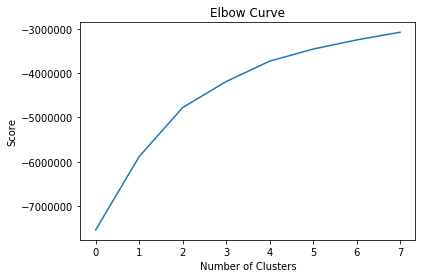

In [65]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.


import numpy as np

a=[]
for i in np.arange(1,9):

    # run k-means clustering on the data and...
    kmeans_4 = KMeans(i)#instantiate your model
    model_4 = kmeans_4.fit(X_pca)
    # compute the average within-cluster distances.
    a.append(model_4.score(X_pca))
    
plt.plot(a)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()



In [66]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans_4 = KMeans(4)
model_4 = kmeans_4.fit(X_pca)
labels_4_total = model_4.predict(X_pca)


### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

I have chosen 4 cluster because you can see a elbow in the prevues graph when there are 4 clusters.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [67]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv',delimiter=';')
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [68]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers2=clean_data2(customers)
customers2.fillna(0, inplace=True)
customers2.head()

variable AGER_TYP is known
variable AGER_TYP is -1 has 92107
variable AGER_TYP is 0 has 4631
variable ALTERSKATEGORIE_GROB is known

/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



variable ALTERSKATEGORIE_GROB is -1 has 0
variable ALTERSKATEGORIE_GROB is 0 has 0
variable ALTERSKATEGORIE_GROB is 9 has 240
variable ANREDE_KZ is known
variable ANREDE_KZ is -1 has 0
variable ANREDE_KZ is 0 has 0
variable CJT_GESAMTTYP is known
variable CJT_GESAMTTYP is 0 has 0
variable FINANZ_MINIMALIST is known
variable FINANZ_MINIMALIST is -1 has 0
variable FINANZ_SPARER is known
variable FINANZ_SPARER is -1 has 0
variable FINANZ_VORSORGER is known
variable FINANZ_VORSORGER is -1 has 0
variable FINANZ_ANLEGER is known
variable FINANZ_ANLEGER is -1 has 0
variable FINANZ_UNAUFFAELLIGER is known
variable FINANZ_UNAUFFAELLIGER is -1 has 0
variable FINANZ_HAUSBAUER is known
variable FINANZ_HAUSBAUER is -1 has 0
variable FINANZTYP is known
variable FINANZTYP is -1 has 0
variable GEBURTSJAHR is known
variable GEBURTSJAHR is 0 has 93024
variable GFK_URLAUBERTYP is known
variable GFK_URLAUBERTYP doesnt have na
variable GREEN_AVANTGARDE is known
variable GREEN_AVANTGARDE doesnt have na
var

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,HouseholdsPoorer,HouseholdsProsperous,HouseholdsWealthy Households,Householdsnan,familyElders In Retirement,familyFamilies With School Age Children,familyOlder Families & Mature Couples,"familyPre,Family Couples & Singles",familyYoung Couples With Children,familynan
0,4.0,5,1,5,1,2,2,1.0,5.0,6,...,0,0,1,0,0,1,0,0,0,0
1,4.0,5,1,5,1,3,2,1.0,0.0,3,...,0,0,0,1,0,0,0,0,0,1
2,4.0,5,1,5,1,4,4,2.0,5.0,2,...,0,0,0,0,0,0,1,0,0,0
3,4.0,5,1,5,2,1,2,2.0,3.0,6,...,0,1,0,0,0,0,1,0,0,0
4,3.0,3,1,4,4,5,2,3.0,5.0,4,...,0,0,0,0,0,0,0,1,0,0


In [69]:
customers2MM=pd.DataFrame(p.MinMaxScaler().fit_transform(customers2), index=customers2.index, columns=customers2.columns)
customers2MM.head()

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,HouseholdsPoorer,HouseholdsProsperous,HouseholdsWealthy Households,Householdsnan,familyElders In Retirement,familyFamilies With School Age Children,familyOlder Families & Mature Couples,"familyPre,Family Couples & Singles",familyYoung Couples With Children,familynan
0,1.00,1.0,0.0,1.00,0.00,0.25,0.25,0.333333,1.0,0.833333,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.00,1.0,0.0,1.00,0.00,0.50,0.25,0.333333,0.0,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.00,1.0,0.0,1.00,0.00,0.75,0.75,0.666667,1.0,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.00,1.0,0.0,1.00,0.25,0.00,0.25,0.666667,0.6,0.833333,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.75,0.5,0.0,0.75,0.75,1.00,0.25,1.000000,1.0,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
customersPCA= pca.transform(customers2MM)

In [71]:
labels_4 = model_4.predict(customersPCA)

In [72]:
labels_4

array([0, 2, 0, ..., 0, 1, 1], dtype=int32)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

# important

I have had to recalcute all the computation. This is because I need to delete from the cluster-pca dataframes (azdias2, customers2) a few observation with more than 15 missing rows so I can add this rows with NANs to a new cluster. 

AZDIAS

In [73]:
print("load data")
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv',delimiter=';')
print("filter data")
Y=azdias.isnull().sum(axis = 1)
azdias1=azdias.loc[(Y<15)]
azdias2=clean_data2(azdias1)
#Nas
azdias2.fillna(0, inplace=True)
print("escaling")
azdias2MM=p.MinMaxScaler().fit_transform(azdias2) 
print("pca")
pca = PCA(9)
X_pca = pca.fit_transform(azdias2MM)
print("kmeans")
kmeans_4 = KMeans(4)
model_4 = kmeans_4.fit(X_pca)
labels_4_total = model_4.predict(X_pca)

load data
filter data
variable AGER_TYP is known
variable AGER_TYP is -1 has 578962


/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alejandro/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


variable AGER_TYP is 0 has 8157
variable ALTERSKATEGORIE_GROB is known
variable ALTERSKATEGORIE_GROB is -1 has 0
variable ALTERSKATEGORIE_GROB is 0 has 0
variable ALTERSKATEGORIE_GROB is 9 has 2753
variable ANREDE_KZ is known
variable ANREDE_KZ is -1 has 0
variable ANREDE_KZ is 0 has 0
variable CJT_GESAMTTYP is known
variable CJT_GESAMTTYP is 0 has 0
variable FINANZ_MINIMALIST is known
variable FINANZ_MINIMALIST is -1 has 0
variable FINANZ_SPARER is known
variable FINANZ_SPARER is -1 has 0
variable FINANZ_VORSORGER is known
variable FINANZ_VORSORGER is -1 has 0
variable FINANZ_ANLEGER is known
variable FINANZ_ANLEGER is -1 has 0
variable FINANZ_UNAUFFAELLIGER is known
variable FINANZ_UNAUFFAELLIGER is -1 has 0
variable FINANZ_HAUSBAUER is known
variable FINANZ_HAUSBAUER is -1 has 0
variable FINANZTYP is known
variable FINANZTYP is -1 has 0
variable GEBURTSJAHR is known
variable GEBURTSJAHR is 0 has 306968
variable GFK_URLAUBERTYP is known
variable GFK_URLAUBERTYP doesnt have na
variabl

/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

GEBURTSJAHR esta
ALTER_HH esta
escaling
pca
kmeans


general

In [74]:
print("load data")
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv',delimiter=';')
print("filter data")
Y=customers.isnull().sum(axis = 1)
customers1=customers.loc[(Y<15)]
customers2=clean_data2(customers1)
#Nas
customers2.fillna(0, inplace=True)
print("escaling")
customers2MM=p.MinMaxScaler().fit_transform(customers2) 
print("pca")
customersPCA= pca.transform(customers2MM)
print("kmeans")
labels_4 = model_4.predict(customersPCA)

load data
filter data
variable AGER_TYP is known
variable AGER_TYP is -1 has 43448
variable AGER_TYP is 0 has 4551
variable ALTERSKATEGORIE_GROB is known


/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alejandro/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


variable ALTERSKATEGORIE_GROB is -1 has 0
variable ALTERSKATEGORIE_GROB is 0 has 0
variable ALTERSKATEGORIE_GROB is 9 has 230
variable ANREDE_KZ is known
variable ANREDE_KZ is -1 has 0
variable ANREDE_KZ is 0 has 0
variable CJT_GESAMTTYP is known
variable CJT_GESAMTTYP is 0 has 0
variable FINANZ_MINIMALIST is known
variable FINANZ_MINIMALIST is -1 has 0
variable FINANZ_SPARER is known
variable FINANZ_SPARER is -1 has 0
variable FINANZ_VORSORGER is known
variable FINANZ_VORSORGER is -1 has 0
variable FINANZ_ANLEGER is known
variable FINANZ_ANLEGER is -1 has 0
variable FINANZ_UNAUFFAELLIGER is known
variable FINANZ_UNAUFFAELLIGER is -1 has 0
variable FINANZ_HAUSBAUER is known
variable FINANZ_HAUSBAUER is -1 has 0
variable FINANZTYP is known
variable FINANZTYP is -1 has 0
variable GEBURTSJAHR is known
variable GEBURTSJAHR is 0 has 44954
variable GFK_URLAUBERTYP is known
variable GFK_URLAUBERTYP doesnt have na
variable GREEN_AVANTGARDE is known
variable GREEN_AVANTGARDE doesnt have na
vari

/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alejandro/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

escaling
pca
kmeans


In [75]:
def full_cluster_df(df,df_clean,clusters,label):
    df_missing = df.drop(df_clean.index,axis=0)
    missing_df = pd.DataFrame(np.unique(clusters)[-1]+1,columns=["clusters"],index=df_missing.index)
    norm_df = pd.DataFrame(clusters,columns=["clusters"],index=df_clean.index)
    clusters_df = pd.concat([norm_df, missing_df])
    clusters_df["labels"] = label
    clusters_df["proportion"]= 1/clusters.shape[0]
    return clusters_df


In [76]:
gp_cluster_predictions=labels_4_total
azdias_clean=azdias2
azdias
general_df = full_cluster_df(azdias,azdias_clean,gp_cluster_predictions,"general")


In [77]:
cp_cluster_predictions=labels_4
customers_clean=customers2
customers=customers

customers_df = full_cluster_df(customers,customers_clean,cp_cluster_predictions,"customers")



In [78]:

comparation_df = pd.concat([general_df,customers_df])
comp_cluster = comparation_df.groupby(["labels","clusters"])[["proportion"]].sum().reset_index()

In [79]:
comp_cluster

,labels,clusters,proportion
0,customers,0,0.028699
1,customers,1,0.285733
2,customers,2,0.188729
3,customers,3,0.496839
4,customers,4,0.368894
5,general,0,0.262004
6,general,1,0.282390
7,general,2,0.252658
8,general,3,0.202948
9,general,4,0.134348


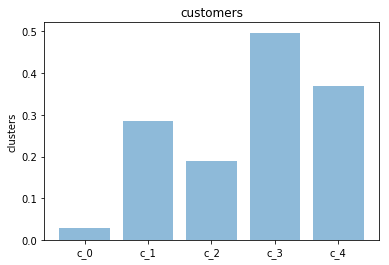

In [80]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

prop=comp_cluster[comp_cluster['labels']=='customers']['proportion']

objects = ('c_0', 'c_1', 'c_2', 'c_3', 'c_4')
y_pos = np.arange(len(prop))
performance = prop
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('clusters')
plt.title('customers')
 
plt.show()

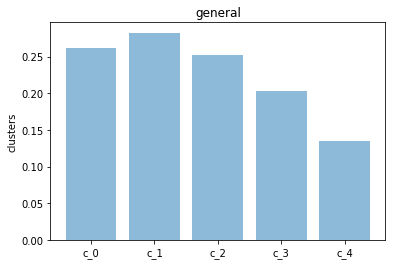

In [81]:
#general
prop=comp_cluster[comp_cluster['labels']=='general']['proportion']

objects = ('c_0', 'c_1', 'c_2', 'c_3', 'c_4')
y_pos = np.arange(len(prop))
performance = prop
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('clusters')
plt.title('general')

plt.show()

In [82]:
#more in clientes dataset cluster=3
df=pd.DataFrame(customersPCA)
a=df[labels_4==2].describe()
np.array(a[a.index=='mean'])
df = pd.DataFrame({'col1' :np.array(a[a.index=='mean'])[0] })
abs(df).sort_values('col1',ascending=False).head()

,col1
1,0.535617
2,0.521572
3,0.388723
6,0.373977
0,0.306495


In [83]:
df2=pd.DataFrame(X_pca)
a2=df2[labels_4_total==2].describe()
np.array(a2[a2.index=='mean'])
df2 = pd.DataFrame({'col1' :np.array(a2[a2.index=='mean'])[0] })
abs(df2).sort_values('col1',ascending=False).head()

,col1
1,1.110453
0,0.911189
2,0.493579
4,0.157165
3,0.052266


In [84]:
#more in population dataset cluster=0
df=pd.DataFrame(customersPCA)
a=df[labels_4==0].describe()
np.array(a[a.index=='mean'])
df = pd.DataFrame({'col1' :np.array(a[a.index=='mean'])[0] })
abs(df).sort_values('col1',ascending=False).head()

,col1
0,0.592250
1,0.508130
3,0.497680
6,0.229285
7,0.168395


In [85]:
df2=pd.DataFrame(X_pca)
a2=df2[labels_4_total==0].describe()
np.array(a2[a2.index=='mean'])
df2 = pd.DataFrame({'col1' :np.array(a2[a2.index=='mean'])[0] })
abs(df2).sort_values('col1',ascending=False).head()

,col1
0,1.335368
1,0.896802
2,0.394261
3,0.131758
8,0.090207


### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

General population gives around 20% to each cluster this is really good because that means that we can classify the entire population in well balanced clusters. What is more there are some differences between distribution of cluster membership of the two datasets. In short, we can see a special behavour in the clients dataset.

On one hand customers dataset are more concentraited in cluster c_3. This cluster gives more importance to component 0 and component 1. This is rows that contian NANs. On the other hand general population dataset give more importance to cluster c_2. This cluster gives more importance to components: 3,4

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.